<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

## 1 Comparing the two ‘dialects’

### 1.1 Some nomenclature

In [13]:
from matplotlib import pyplot as plt

### 1.2 We need some data.

In [11]:
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)
# u won't get an output just defining variables here


### 1.3 Here comes the comparison

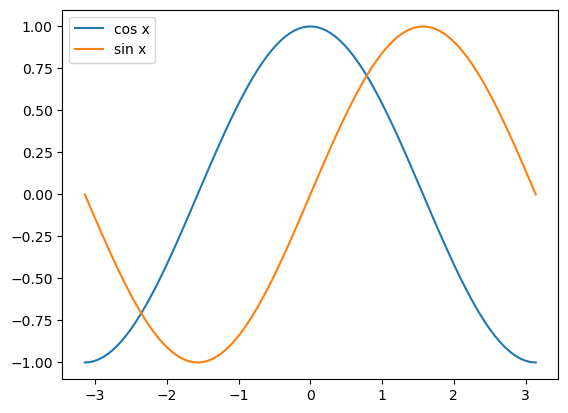

In [5]:
#pyplot interface
plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()
plt.show()


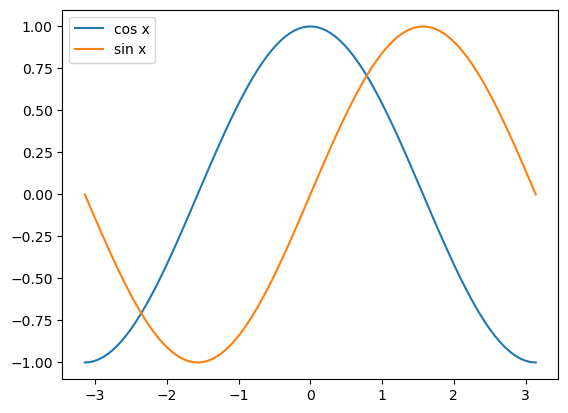

In [6]:
# OO interface
fig, ax = plt.subplots(nrows=1, ncols=1) # what subplot does is basically creating like a grid so that multiple plots can 
ax.plot(x, cos_x, label='cos x') # be plotted in the same figure. it takes (rows,columns,index) in the bracket. index is
ax.plot(x, sin_x, label='sin x') # to tell where the first plot should be plotted in the 'grid'
ax.legend() # ax.plot is similar to plt.plot but ax variable is a ref to an axes object. so ax.plot is adding plot to 
plt.show() # axes object

## 2 Using the OO Interface

### 2.1 Getting ax

In [20]:
%matplotlib inline

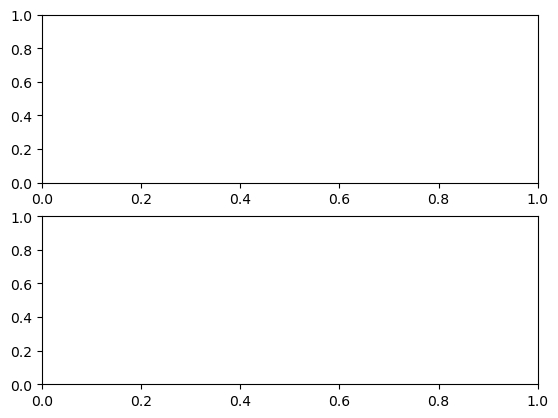

In [23]:
fig, ax = plt.subplots(ncols=1, nrows=2) # u get 2 axes

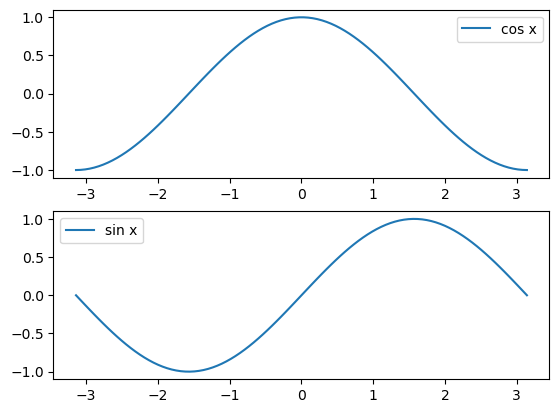

In [22]:
# ignore ig
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)
fig, ax = plt.subplots(ncols=1, nrows=2)
ax[0].plot(x, cos_x, label='cos x') # ax is a 2D numpy array, so we access the subplots using square brackets, index it
ax[1].plot(x, sin_x, label='sin x')
ax[0].legend()
ax[1].legend()
plt.show()

### 2.2 What is ax

In [24]:
type(ax) # its a numpy array 


numpy.ndarray

In [25]:
ax.shape # its a 2d numpy array

(2,)

In [26]:
type(ax[0]) # matplotlib axes

matplotlib.axes._subplots.AxesSubplot

### 2.3 Plots in a column

In [27]:
ax[0].plot(x, cos_x, label='cos x') # first column 
ax[1].plot(x, sin_x, label='sin x') # second column, use indexing to identify cus its a 2d array 

### 2.4 Legends

In [28]:
ax[0].legend()
ax[1].legend() # same as plotting in prev
for a in ax: # rmbr ax is a 2d array
    a.legend()
    a.grid(alpha=.25) # adding grid to each axes


### 2.5 Tweaks

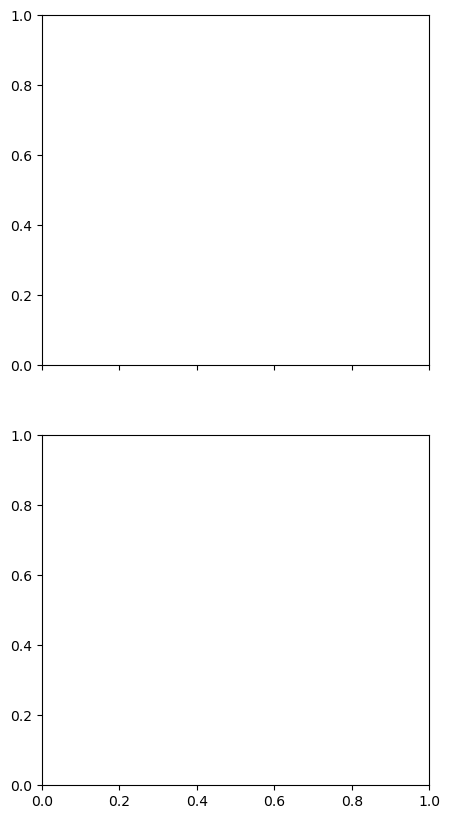

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(5, 10),   # 10 x 5 inches idk why its reading it from right to left 
                       sharex=True)


## 3 More rows and columns

### 3.1 Using ax

In [ ]:

# Your code here


### 3.2 Sharing axes

In [ ]:

# Your code here


### 3.3 Accessing all axes

In [ ]:

# Your code here


## 4 Other useful plots

### 4.1 Histograms

In [ ]:

# Your code here


### 4.2 Scatter plots

In [ ]:

# Your code here


### 4.3 Bar charts

In [ ]:

# Your code here


### 4.4 Pie charts

In [ ]:

# Your code here


## Exercise 1 :  Plotting data from files

In [ ]:



# Your solution here


